In [44]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

font_location = 'C:/Windows/Fonts/malgunsl.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
sns.set(rc = {'figure.figsize':(15,8)})
matplotlib.rc('font' , family=font_name)#한글폰트 설정

In [3]:
df = pd.read_excel('data_2/최종_merge.xlsx', index_col=0)

In [6]:
df.rename(columns={'화물명' : '기존화물명',
                  '화물명.1' : '적재화물명'}, inplace=True)
df

,선명,호출부호,입항년도,입항월,입항횟수,입출,총톤수,작업시간,입항일시,출항일시,...,고지금액,화물료,화물보안료,선사대리점,적재톤수,양하톤수,출항_적재톤수,출항_적하톤수,기존화물명,적재화물명
0,아세안 메저스티호,DSMZ8,2012,1,1,1,71383,7.916667,2012-01-03 10:05:00,2012-01-03 18:00:00,...,"5,150","5,150",0,유코카캐리어스(주),2003,3,3356,1356,차량,차량
1,모닝쿠리어,C6UI2,2012,1,1,1,57692,12.916667,2012-01-06 07:30:00,2012-01-06 20:25:00,...,"457,050","457,050",0,유코카캐리어스(주),2347,347,3586,1586,차량,차량
2,MORNING LINDA,3ETI,2012,1,1,1,68701,13.500000,2012-01-07 07:20:00,2012-01-07 20:50:00,...,"13,060","13,060",0,현대글로비스주식회사,2018,18,5179,3179,차량,차량
3,GLOVIS PACIFIC,D8HO,2012,1,1,1,47367,26.916667,2012-01-11 07:50:00,2012-01-12 10:45:00,...,"21,520","21,520",0,현대글로비스주식회사,2015,15,3388,1388,차량,차량
4,MIGNON,SJCD,2012,1,1,1,67264,11.333333,2012-01-14 07:40:00,2012-01-14 19:00:00,...,"66,600","66,600",0,유코카캐리어스(주),2110,4,4028,2028,차량,차량
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5376,글로비스 썬,V7BC8,2021,7,2,0,65697,15.083333,2021-07-31 07:50:00,2021-07-31 22:55:00,...,"2,752,920","2,741,640","11,280",현대글로비스주식회사,4000,0,7393,3393,차량,차량
5377,VIKING DESTINY,V7HR6,2021,7,2,0,62105,55.833333,2021-07-31 12:10:00,2021-08-02 20:00:00,...,"2,762,090","2,674,800","87,290",현대글로비스주식회사,3088,123,7778,4690,차량,차량
5378,CSAV RIO NEVADO,D5DX5,2021,7,4,0,46800,10.083333,2021-07-31 12:25:00,2021-07-31 22:30:00,...,"2,361,840","2,361,840",0,현대글로비스주식회사,1709,0,4485,2776,차량,차량
5379,MORNING MIDAS,MMNA2,2021,8,1,0,46800,15.750000,2021-08-11 06:15:00,2021-08-11 22:00:00,...,"4,072,200","4,072,200",0,유코카캐리어스(주),0,0,4462,4462,empty,차량


In [58]:
# 돈 관련 문자열에서 ',' 제거 후 numeric으로 변환
for colname in ['고지금액', '화물료', '화물보안료']:
    df[colname] = df[colname].str.replaceace(',', '')
    df[colname] = pd.to_numeric(df[colname])

# 일변량 데이터 분석

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6175 entries, 0 to 5380
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   선명       6175 non-null   object        
 1   호출부호     6175 non-null   object        
 2   입항년도     6175 non-null   int64         
 3   입항월      6175 non-null   int64         
 4   입항횟수     6175 non-null   int64         
 5   입출       6175 non-null   int64         
 6   총톤수      6175 non-null   int64         
 7   작업시간     6175 non-null   float64       
 8   입항일시     6175 non-null   datetime64[ns]
 9   출항일시     6175 non-null   datetime64[ns]
 10  계선장소     6175 non-null   object        
 11  계선장소.1   6175 non-null   int64         
 12  예선       6175 non-null   int64         
 13  도선       6175 non-null   int64         
 14  차항지      6175 non-null   object        
 15  전출항지     6175 non-null   object        
 16  선사번호     6175 non-null   object        
 17  고지금액     6175 non-null   int64   

In [60]:
df.describe()

,입항년도,입항월,입항횟수,입출,총톤수,작업시간,계선장소.1,예선,도선,고지금액,화물료,화물보안료,적재톤수,양하톤수,출항_적재톤수,출항_적하톤수
count,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6.175000e+03,6.175000e+03,1649.000000,6175.00000,6175.000000,6175.000000,6175.000000
mean,2016.126640,6.325668,2.335870,0.128583,56094.434332,31.137590,1.878866,0.988016,0.988178,2.060891e+06,2.056370e+06,16931.582777,1846.17587,214.300567,4253.938947,2727.258785
std,2.863399,3.399539,1.612703,0.334765,11197.276715,34.743110,0.765657,0.108821,0.108093,1.618710e+06,1.614990e+06,24244.740474,2106.77384,801.539341,2634.857597,12840.920808
min,2012.000000,1.000000,1.000000,0.000000,4464.000000,1.166667,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000,29.000000,0.000000
25%,2014.000000,3.000000,1.000000,0.000000,49750.000000,9.541667,1.000000,1.000000,1.000000,8.365800e+05,8.327400e+05,0.000000,0.00000,0.000000,2184.000000,1000.000000
50%,2016.000000,6.000000,2.000000,0.000000,58767.000000,18.016667,2.000000,1.000000,1.000000,1.670130e+06,1.669220e+06,3550.000000,2000.00000,0.000000,4097.000000,2100.000000
75%,2019.000000,9.000000,3.000000,0.000000,60876.000000,36.941667,2.000000,1.000000,1.000000,2.956080e+06,2.943490e+06,27740.000000,2639.00000,1.000000,6187.000000,3612.000000
max,2021.000000,12.000000,13.000000,1.000000,76420.000000,382.500000,3.000000,1.000000,1.000000,1.100628e+07,1.100628e+07,186570.000000,43312.00000,43312.000000,49364.000000,999999.000000


In [9]:
df['기존화물명'].value_counts()

차량        3999
empty     2154
기계류          9
유기 화합물       5
선박           3
철강제품         2
목재,목탄        2
기타           1
Name: 기존화물명, dtype: int64

<AxesSubplot:xlabel='기존화물명', ylabel='count'>

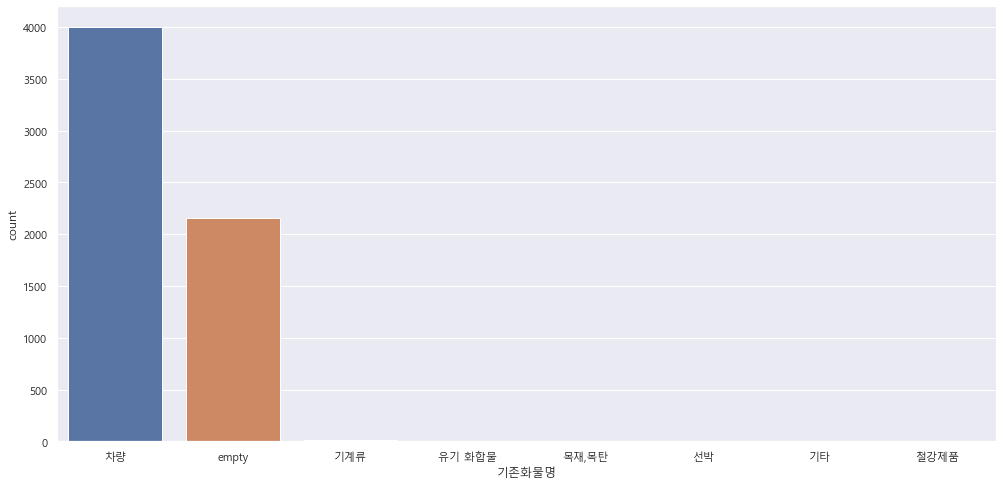

In [10]:
sns.countplot(df['기존화물명'])

In [11]:
# 적재화물명은 전부 차량이다.
df['적재화물명'].value_counts()

차량    6175
Name: 적재화물명, dtype: int64

<AxesSubplot:xlabel='입출', ylabel='count'>

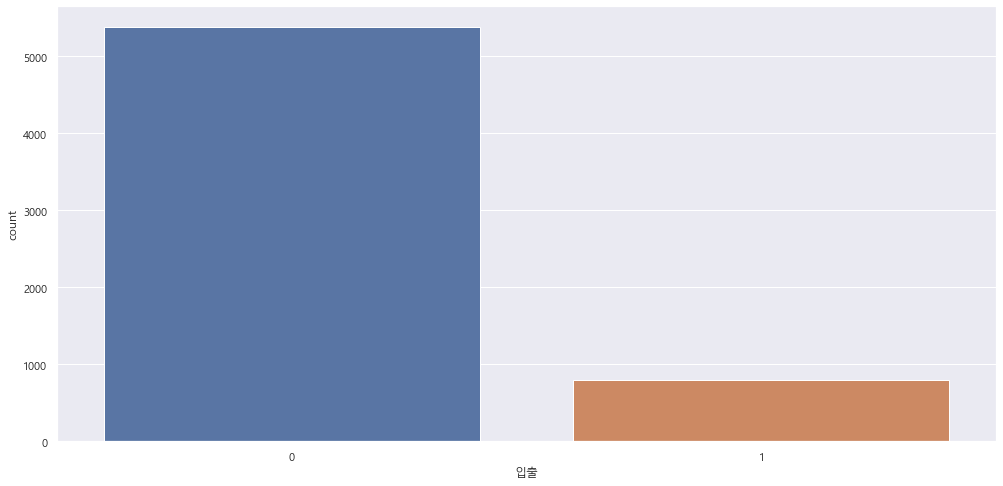

In [6]:
sns.countplot(df['입출'])

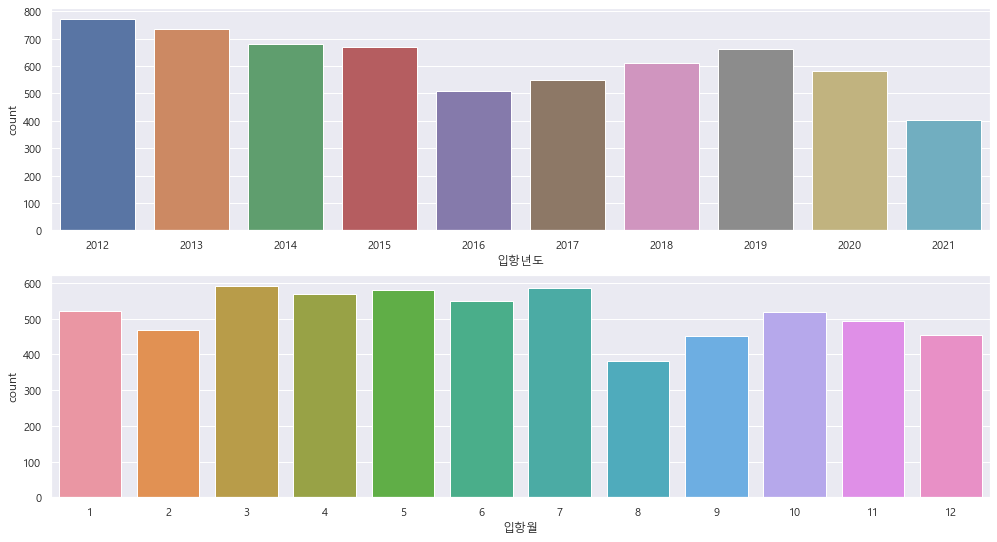

<Figure size 1440x1080 with 0 Axes>

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=1)
axes = axes.flatten()
sns.countplot(df['입항년도'], ax=axes[0])
sns.countplot(df['입항월'], ax=axes[1])
plt.figure(figsize=(20, 15))  # plot 크기 조정하는 건데 안 바뀌어서 모르겠음?? 왜 안 바뀌지......
plt.show()

In [14]:
df['예선'].value_counts()

1    6101
0      74
Name: 예선, dtype: int64

<AxesSubplot:xlabel='도선', ylabel='count'>

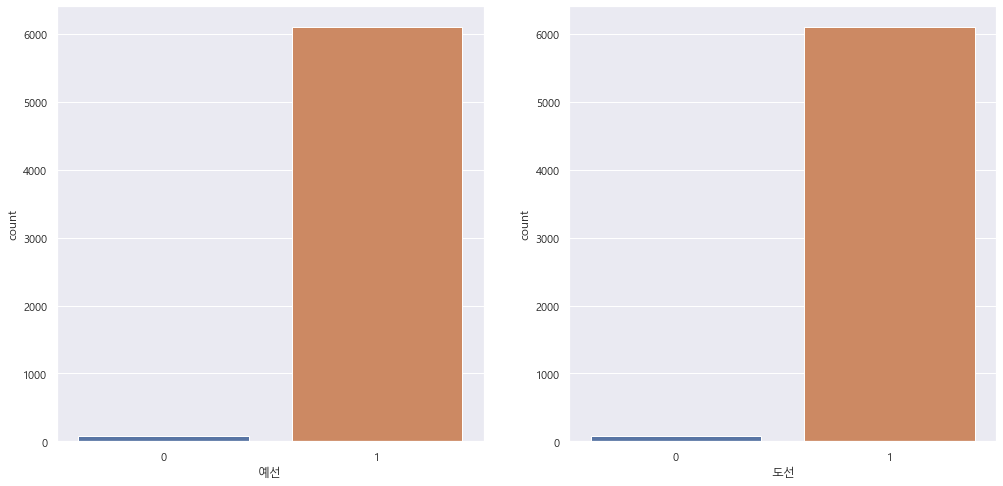

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes = axes.flatten()
sns.countplot(df['예선'], ax=axes[0])
sns.countplot(df['도선'], ax=axes[1])

<AxesSubplot:xlabel='작업시간', ylabel='Count'>

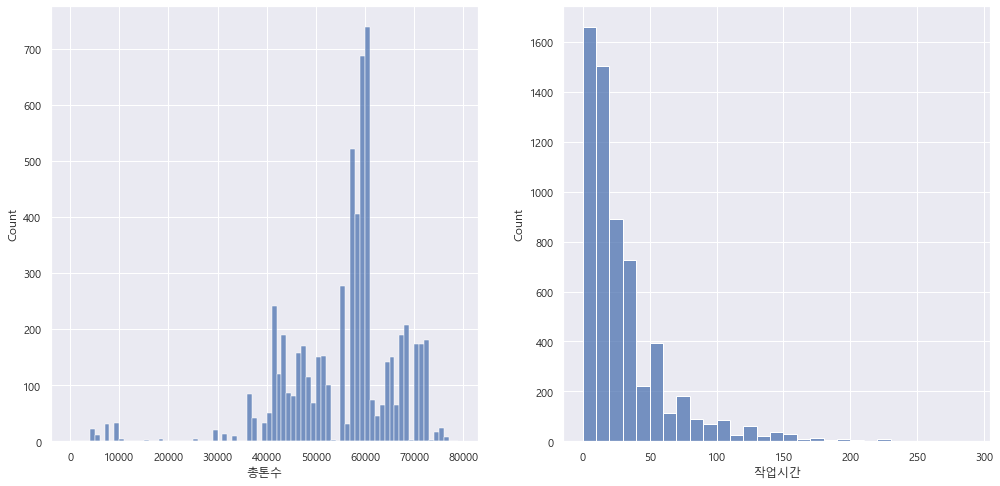

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes = axes.flatten()
sns.histplot(df['총톤수'], bins = range(0, 80000, 1000), ax=axes[0])
sns.histplot(df['작업시간'], bins=range(0, 300, 10), ax=axes[1])

<AxesSubplot:xlabel='출항_적재톤수', ylabel='Count'>

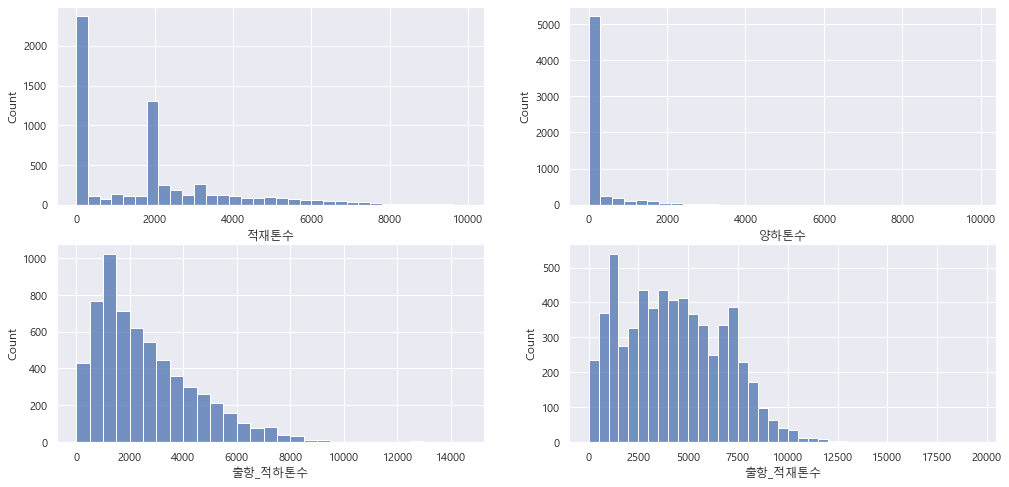

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes = axes.flatten()
sns.histplot(data=df, x='적재톤수', bins=range(0, 10000, 300), ax=axes[0])
sns.histplot(data=df, x='양하톤수', bins=range(0, 10000, 300), ax=axes[1])
sns.histplot(data=df, x='출항_적하톤수', bins=range(0, 15000, 500), ax=axes[2])
sns.histplot(data=df, x='출항_적재톤수', bins=range(0, 20000, 500), ax=axes[3])

아래를 보면 알 수 있는 점\
EUKO: 유코카캐리어스(주)\
GLVS: 현대글로비스주식회사

<AxesSubplot:xlabel='선사대리점', ylabel='count'>

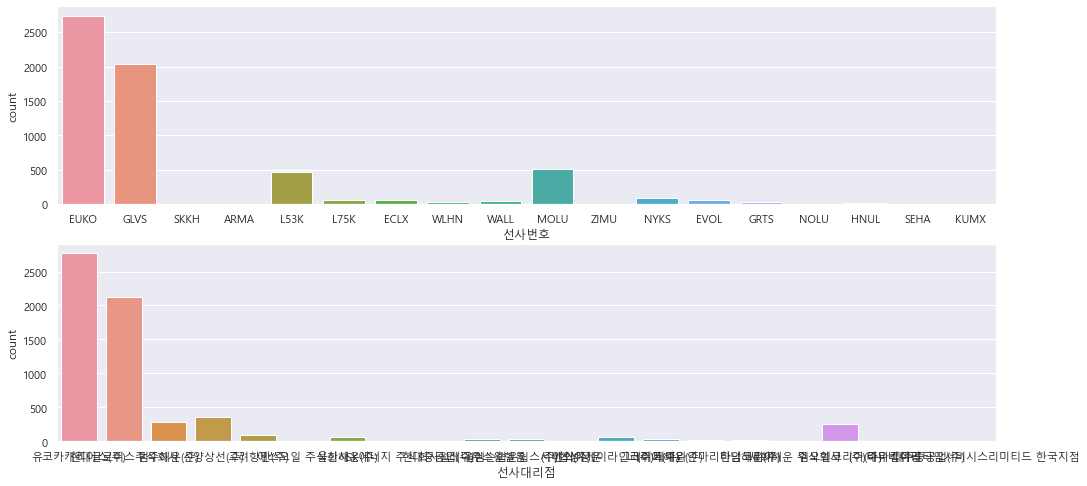

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=1)
axes = axes.flatten()
sns.countplot(df['선사번호'], ax=axes[0])
sns.countplot(df['선사대리점'], ax=axes[1])

<AxesSubplot:xlabel='고지금액', ylabel='Count'>

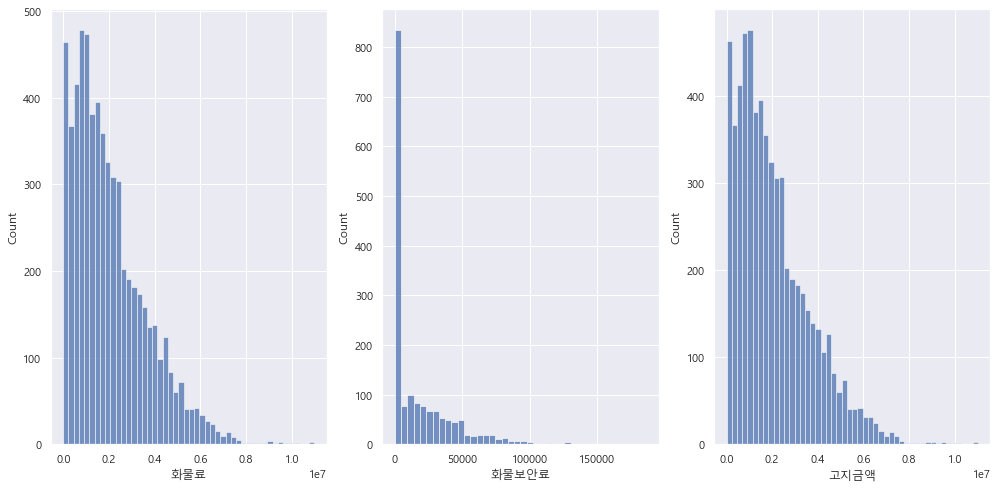

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=3)
axes = axes.flatten()
sns.histplot(data=df, x='화물료', ax=axes[0])
sns.histplot(data=df, x='화물보안료', ax=axes[1])
sns.histplot(data=df, x='고지금액', ax=axes[24op])

# 이변량 데이터 분석

In [57]:
df 

,선명,호출부호,입항년도,입항월,입항횟수,입출,총톤수,작업시간,입항일시,출항일시,...,고지금액,화물료,화물보안료,선사대리점,적재톤수,양하톤수,출항_적재톤수,출항_적하톤수,기존화물명,적재화물명
0,아세안 메저스티호,DSMZ8,2012,1,1,1,71383,7.916667,2012-01-03 10:05:00,2012-01-03 18:00:00,...,"5,150","5,150",0,유코카캐리어스(주),2003,3,3356,1356,차량,차량
1,모닝쿠리어,C6UI2,2012,1,1,1,57692,12.916667,2012-01-06 07:30:00,2012-01-06 20:25:00,...,"457,050","457,050",0,유코카캐리어스(주),2347,347,3586,1586,차량,차량
2,MORNING LINDA,3ETI,2012,1,1,1,68701,13.500000,2012-01-07 07:20:00,2012-01-07 20:50:00,...,"13,060","13,060",0,현대글로비스주식회사,2018,18,5179,3179,차량,차량
3,GLOVIS PACIFIC,D8HO,2012,1,1,1,47367,26.916667,2012-01-11 07:50:00,2012-01-12 10:45:00,...,"21,520","21,520",0,현대글로비스주식회사,2015,15,3388,1388,차량,차량
4,MIGNON,SJCD,2012,1,1,1,67264,11.333333,2012-01-14 07:40:00,2012-01-14 19:00:00,...,"66,600","66,600",0,유코카캐리어스(주),2110,4,4028,2028,차량,차량
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5376,글로비스 썬,V7BC8,2021,7,2,0,65697,15.083333,2021-07-31 07:50:00,2021-07-31 22:55:00,...,"2,752,920","2,741,640","11,280",현대글로비스주식회사,4000,0,7393,3393,차량,차량
5377,VIKING DESTINY,V7HR6,2021,7,2,0,62105,55.833333,2021-07-31 12:10:00,2021-08-02 20:00:00,...,"2,762,090","2,674,800","87,290",현대글로비스주식회사,3088,123,7778,4690,차량,차량
5378,CSAV RIO NEVADO,D5DX5,2021,7,4,0,46800,10.083333,2021-07-31 12:25:00,2021-07-31 22:30:00,...,"2,361,840","2,361,840",0,현대글로비스주식회사,1709,0,4485,2776,차량,차량
5379,MORNING MIDAS,MMNA2,2021,8,1,0,46800,15.750000,2021-08-11 06:15:00,2021-08-11 22:00:00,...,"4,072,200","4,072,200",0,유코카캐리어스(주),0,0,4462,4462,empty,차량


<AxesSubplot:xlabel='고지금액', ylabel='화물보안료'>

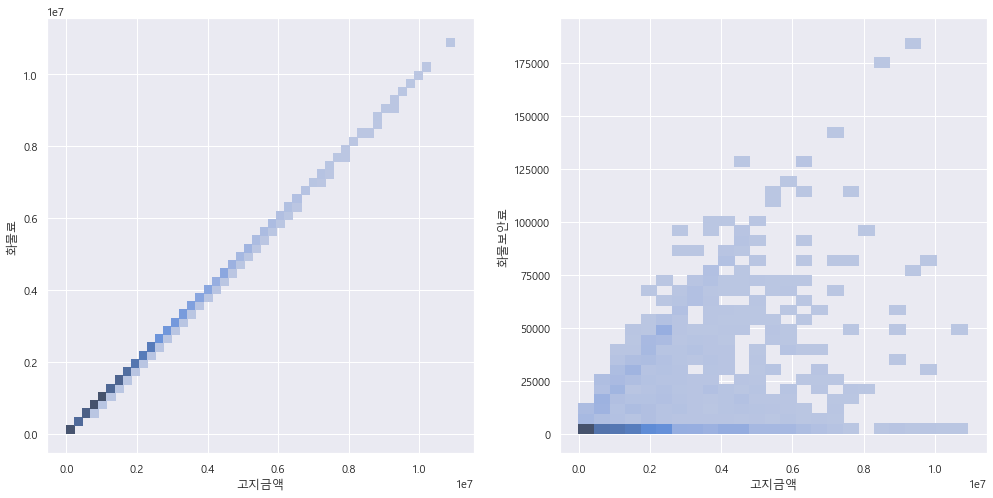

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes = axes.flatten()
sns.histplot(x=df['고지금액'], y=df['화물료'], ax=axes[0])
sns.histplot(x=df['고지금액'], y=df['화물보안료'], ax=axes[1])
sns.histplot(x=df['화물료'], y=df['화물보안료'], ax=axes[2])

In [ ]:
# sns.histplot(data=df, x='양하톤수', hue='화물명') # d이거 돌리면 에러남 과부하 옴